In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [40]:
df.info()
df.isnull().sum()  # Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

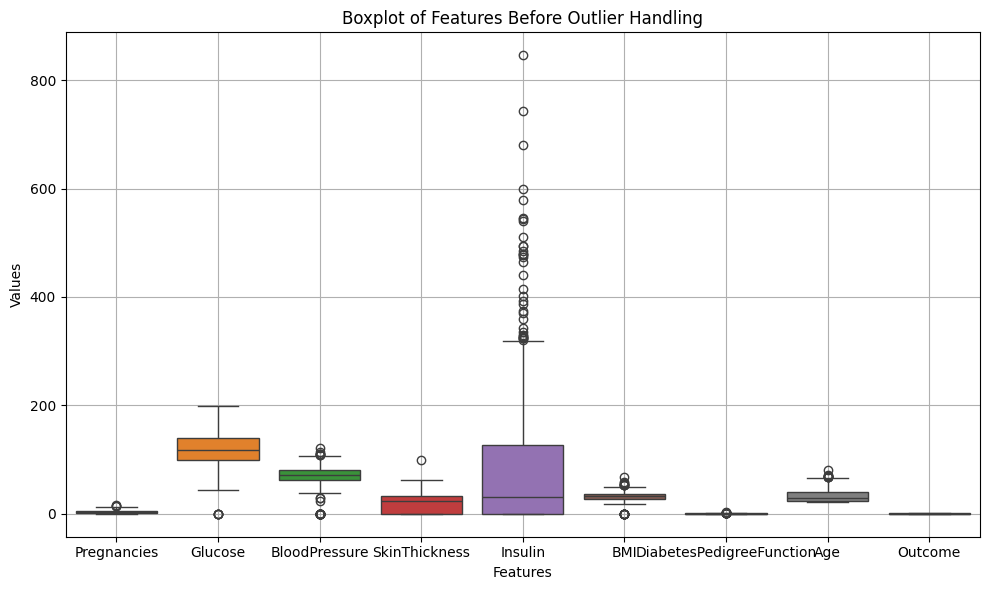

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Features Before Outlier Handling")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
def cap_outliers(df, features):
    df_capped = df.copy()
    for col in features:
        lower = df[col].quantile(0.05)
        upper = df[col].quantile(0.95)
        df_capped[col] = np.clip(df[col], lower, upper)
    return df_capped

num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove("Outcome")  # Excludes target column
df_capped = cap_outliers(df, num_cols)


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_capped.iloc[:, :-1]), columns=df_capped.columns[:-1])
df_scaled["Outcome"] = df_capped["Outcome"]

In [31]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop("Outcome", axis=1)
y = df_scaled["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
log_reg = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
#Training our models
log_reg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16028\359066776.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette="viridis")


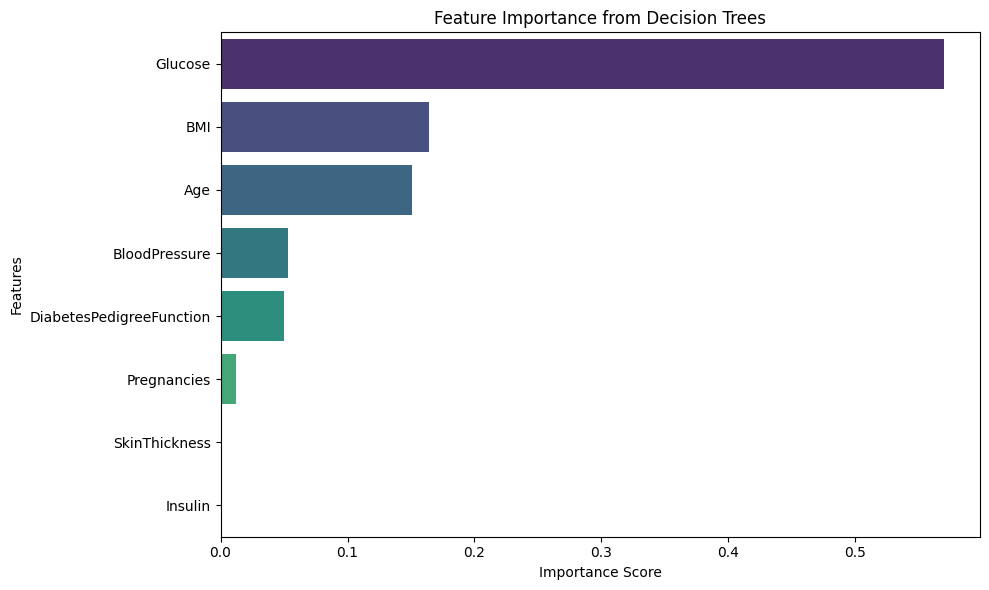

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = dt.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette="viridis")
plt.title("Feature Importance from Decision Trees")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16028\3477834633.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette="viridis")


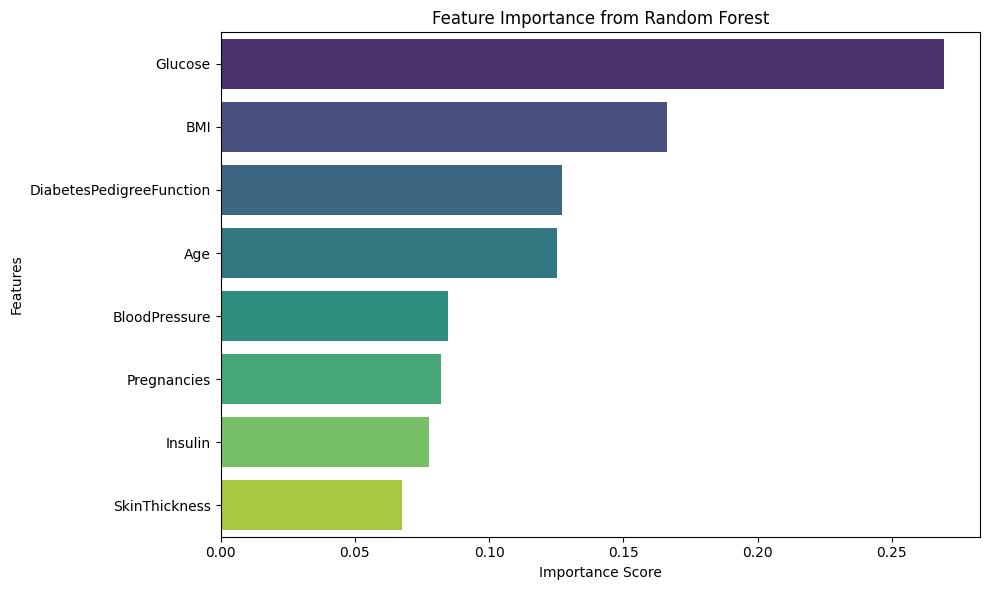

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc, ConfusionMatrixDisplay

y_pred_log = log_reg.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification Reports
print("\nLogistic Regression:\n", classification_report(y_test, y_pred_log))
print("\nDecision Tree:\n", classification_report(y_test, y_pred_dt))
print("\nRandom Forest:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.7142857142857143
Decision Tree Accuracy: 0.7857142857142857
Random Forest Accuracy: 0.7597402597402597

Logistic Regression:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


Decision Tree:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       100
           1       0.68      0.72      0.70        54

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154


Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64  

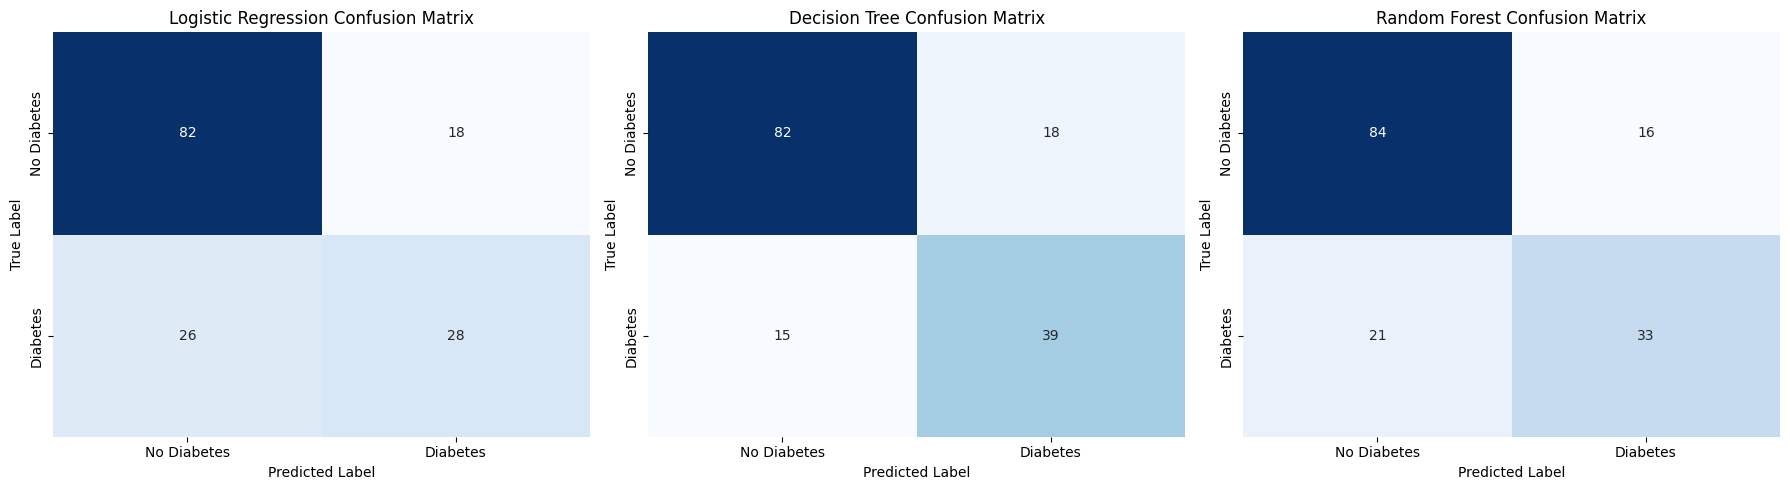

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = {
    "Logistic Regression": confusion_matrix(y_test, y_pred_log),
    "Decision Tree": confusion_matrix(y_test, y_pred_dt),
    "Random Forest": confusion_matrix(y_test, y_pred_rf)
}

for ax, (title, cm) in zip(axes, models.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
                xticklabels=["No Diabetes", "Diabetes"],
                yticklabels=["No Diabetes", "Diabetes"], ax=ax)
    ax.set_title(f"{title} Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()


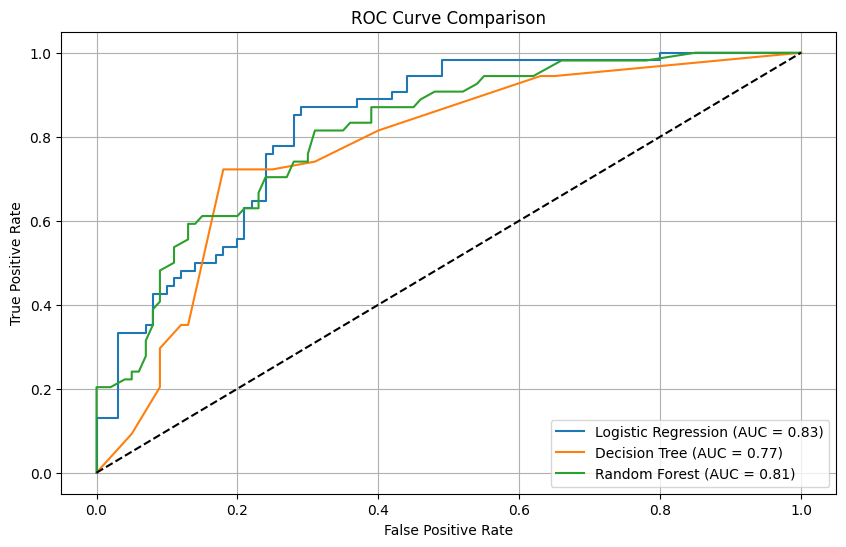

In [35]:
y_proba_log = log_reg.predict_proba(X_test)[:, 1]
y_proba_dt = dt.predict_proba(X_test)[:, 1]
y_proba_rf = rf.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

auc_log = auc(fpr_log, tpr_log)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [52]:

def predict_from_user_input():
    print("\n🧾 Please enter the following health metrics:")

    input_features = [
        "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
        "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
    ]

    user_data = []
    for feature in input_features:
        value = float(input(f"{feature}: "))
        user_data.append(value)
    user_df = pd.DataFrame([user_data], columns=input_features)

    for col in input_features:
        lower = df[col].quantile(0.05)
        upper = df[col].quantile(0.95)
        user_df[col] = np.clip(user_df[col], lower, upper)
        
    user_scaled = scaler.transform(user_df)

    prediction = dt.predict(user_scaled)[0]
    probability = dt.predict_proba(user_scaled)[0][1]

    print("\n🔮 Prediction Result:")
    if prediction == 1:
        print(f"⚠️ The model predicts that the person is likely to have diabetes. (Confidence: {probability*100:.2f}%)")
    else:
        print(f"✅ The model predicts that the person is unlikely to have diabetes. (Confidence: {(1-probability)*100:.2f}%)")

predict_from_user_input()



🧾 Please enter the following health metrics:


Pregnancies:  0
Glucose:  100
BloodPressure:  90
SkinThickness:  30
Insulin:  100
BMI:  28
DiabetesPedigreeFunction:  0.5
Age:  27



🔮 Prediction Result:
✅ The model predicts that the person is unlikely to have diabetes. (Confidence: 69.70%)


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
